<a href="https://colab.research.google.com/github/tjbingamon/Prediction-of-Product-Sales/blob/main/Prediction-of-Product-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of Product Sales
 Thomas Bingamon


## Project Overview

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
filename = ('/content/drive/MyDrive/Homework Stuff/sales_predictions.xlsx')

- Display head of data frame

In [3]:
product_df = pd.read_excel(filename)
product_df
product_df.info()
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. How many rows and columns?

In [4]:
product_df.shape

(8523, 12)

2. What are the datatypes of each variable?




In [5]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

In [6]:
product_df.duplicated().sum()

0

4. Identify missing values.

In [7]:
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [8]:
# "Outlet_Establishment_Year", "Outlet_Location_Type", and "Outlet_Type" are not relevant to the data we need.
product_df2 = product_df
# the Item_Weight and Outlet_Size both contain missing values that are irrelevant to the exploratory analysis of the assignemnt.
product_df2.drop(columns=['Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,1845.5976


6. Confirm that there are no missing values after addressing them.

In [9]:
product_df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7.  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [21]:
product_df2['Item_Fat_Content'].replace('LF','Low Fat')
#repolace LF with low fat in item_fat_content and Reg with Regular
product_df2['Item_Fat_Content'].replace('reg','Regular')
product_df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,none,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,none,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [19]:
print1 = product_df2["Item_MRP"].describe() 
print2 = product_df2["Item_Outlet_Sales"].describe() 
print3 = product_df2["Item_Visibility"].describe() 

print(print1 ,print2 ,print3)

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64 count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64 count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


## Exploratory Data Analysis

Histogram to view the distributions of various features in your dataset.

Text(0, 0.5, 'Item_MRP')

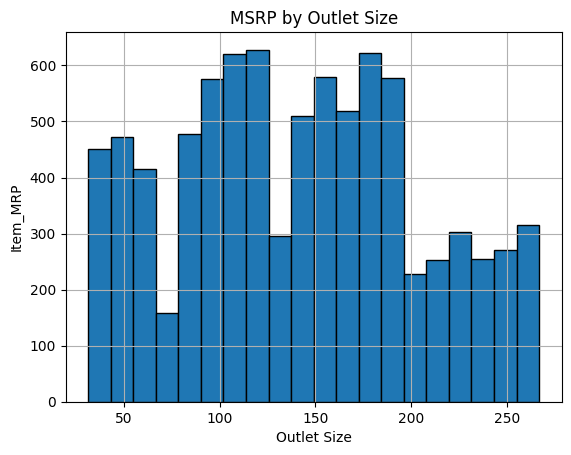

In [28]:
ax = product_df2['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.ticklabel_format(style='plain')
ax.set_title('MSRP by Outlet Size')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item_MRP')

Boxplot to view statistical summaries of various features in your dataset.

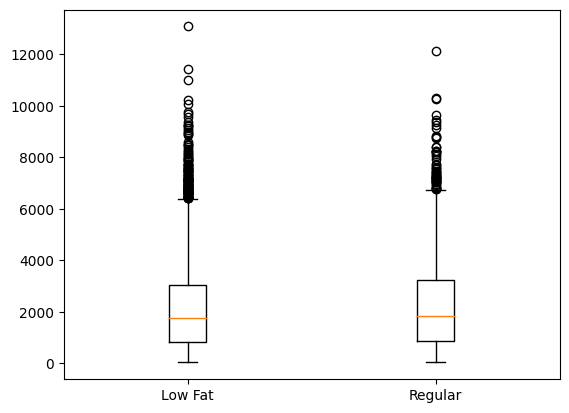

In [85]:
lf =  product_df2.loc[product_df2['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
rg =  product_df2.loc[product_df2['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([lf,rg], labels=['Low Fat', 'Regular']);


Heatmap of the correlation between features

<ipython-input-32-e53020637851>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= product_df2.corr()


<Axes: >

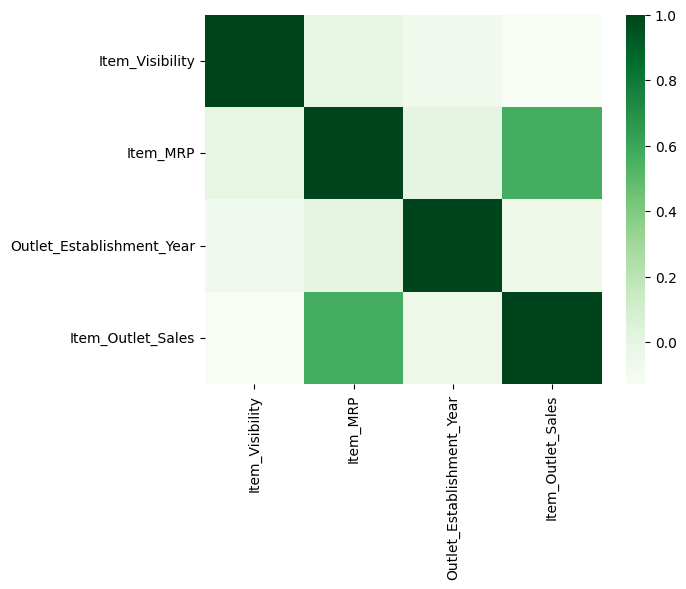

In [32]:
corr= product_df2.corr()

sns.heatmap(corr, cmap = 'Greens')

## Explanatory Data Analysis